# Import all the neccessary libraries

In [112]:
# For data manipulation
import pandas as pd
import numpy as np
# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Load datasets

In [113]:
# Data downloaded from kaggle
df=pd.read_csv("books.csv")

ParserError: ignored

In [114]:
df=pd.read_csv("books.csv",error_bad_lines=False)

<ipython-input-114-3261aecbafbd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("books.csv",error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



# View the datasets

In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [115]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [116]:
df.sample()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8544,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,0310249872,9780310249870,eng,336,1,1,6/17/2003,Zondervan


# Data Understanding

* BookID: Unique identification number for each book
* Title: Name under which book was published
* Authors: Name of the Authors of the book
* Average_rating: Avarage rating of the book received in total.
* ISBN: International standarded book number
* ISBN13: 13 digit isbn to identify
* Language_code: Primary Language of the book
* Num_Pages: Number of pages the biik containes
* Ratings_count: Total Number of ratings the book received.
* text_reviews_count: Total number of ratings the book recevied.
* Text_reviews_count:Total number of written reviews recevied.
* Publication_date:Date when the book was first published.
* Publisher: Name of the publishers

# Dataset having 11123 rows and 12 columns.

In [10]:
df.shape

(11123, 12)

In [11]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

# Name_pages column have space which create problem in future for this reason remove it

In [12]:
df.columns=df.columns.str.strip()

In [13]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [14]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [16]:
df.describe().T  # Numerical data description

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


In [117]:
df.describe(include='object').T # categorical data description

,count,unique,top,freq
title,11123,10348,The Iliad,9
authors,11123,6639,Stephen King,40
isbn,11123,11123,0439785960,1
language_code,11123,27,eng,8908
publication_date,11123,3679,10/1/2005,56
publisher,11123,2290,Vintage,318


In [20]:
df.isnull().sum()   # Check null values


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [23]:
df.duplicated().any() # check duplicate values

False

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Feature Engineering
* Extract Important Features
* Reducing the size of Features
* Creating new features from the existing ones

In [25]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [26]:
df.isbn.nunique()

11123

In [27]:
df.isbn13.nunique()

11123

## Extracting  important feature and drop unneccessary features

In [31]:
df.drop(['bookID','isbn','isbn13'],axis=1,inplace= True)

In [32]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco


In [33]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [34]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

## Creating new features from the existing one

In [35]:
df['year']=df['publication_date'].str.split('/')
df['year']=df['year'].apply(lambda x:x[2])

In [36]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   language_code       11123 non-null  object 
 4   num_pages           11123 non-null  int64  
 5   ratings_count       11123 non-null  int64  
 6   text_reviews_count  11123 non-null  int64  
 7   publication_date    11123 non-null  object 
 8   publisher           11123 non-null  object 
 9   year                11123 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 869.1+ KB


# Reducing the size of features

In [38]:
df['year'] =df['year'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   language_code       11123 non-null  object 
 4   num_pages           11123 non-null  int64  
 5   ratings_count       11123 non-null  int64  
 6   text_reviews_count  11123 non-null  int64  
 7   publication_date    11123 non-null  object 
 8   publisher           11123 non-null  object 
 9   year                11123 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 869.1+ KB


In [40]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [41]:
df['year'].min()

1900

In [42]:
df['year'].max()

2020

# Exploratory Data Analysis

In [43]:
df.columns


Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [44]:
df[df['year']==2020][['title','authors','average_rating','language_code','publisher']]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [46]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

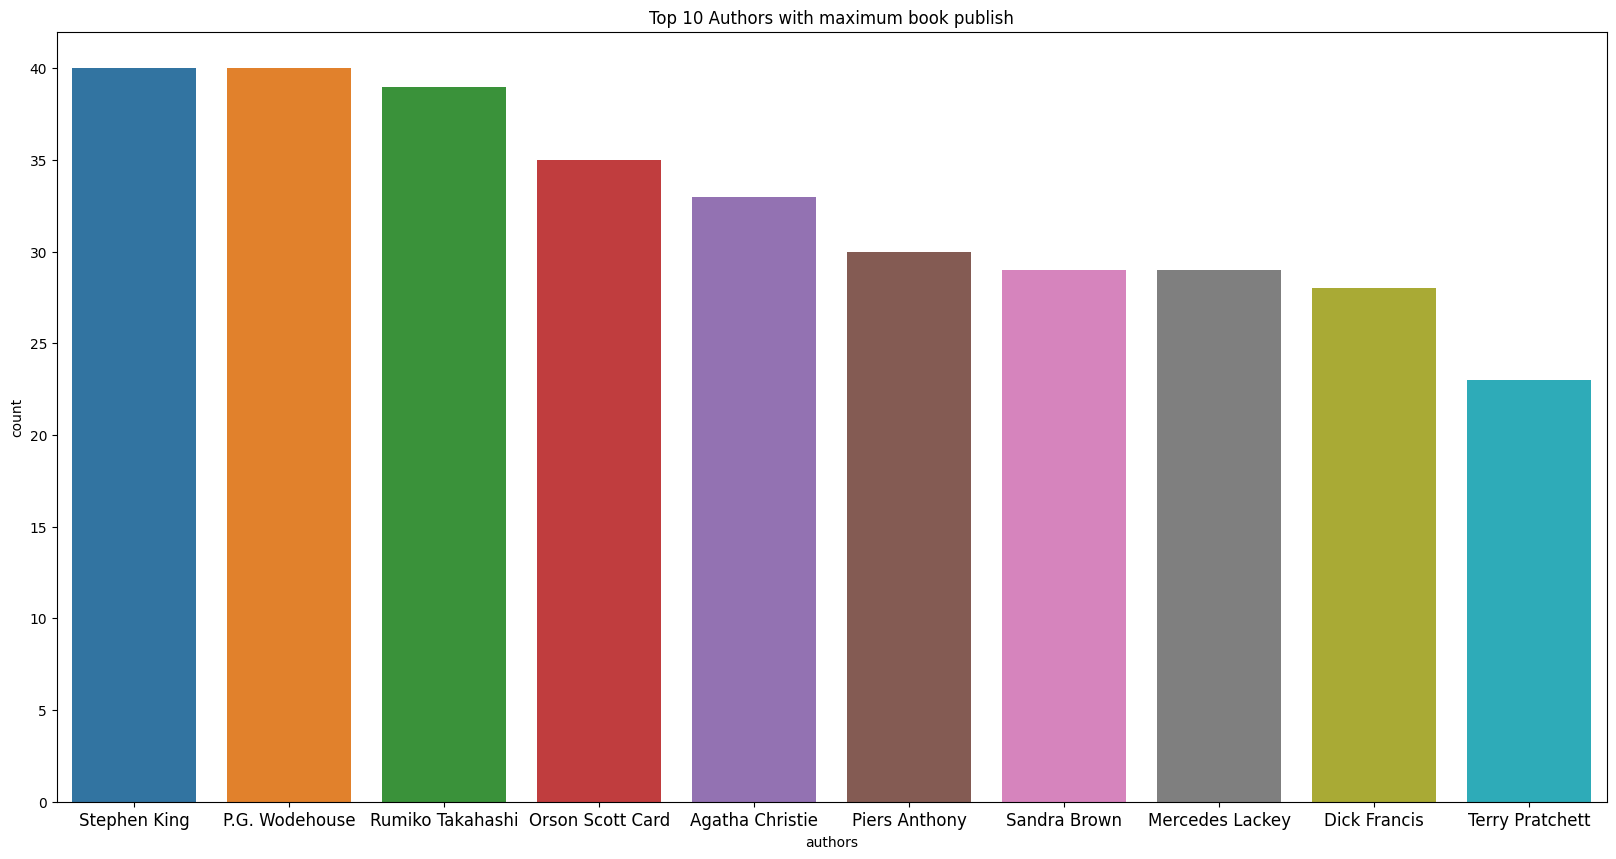

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(x='authors',data=df,order=df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize=12)
plt.show()


In [51]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [53]:
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [59]:
df.groupby(['language_code'])[['average_rating','ratings_count','text_reviews_count']].agg('mean').style.background_gradient(cmap='Wistia')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


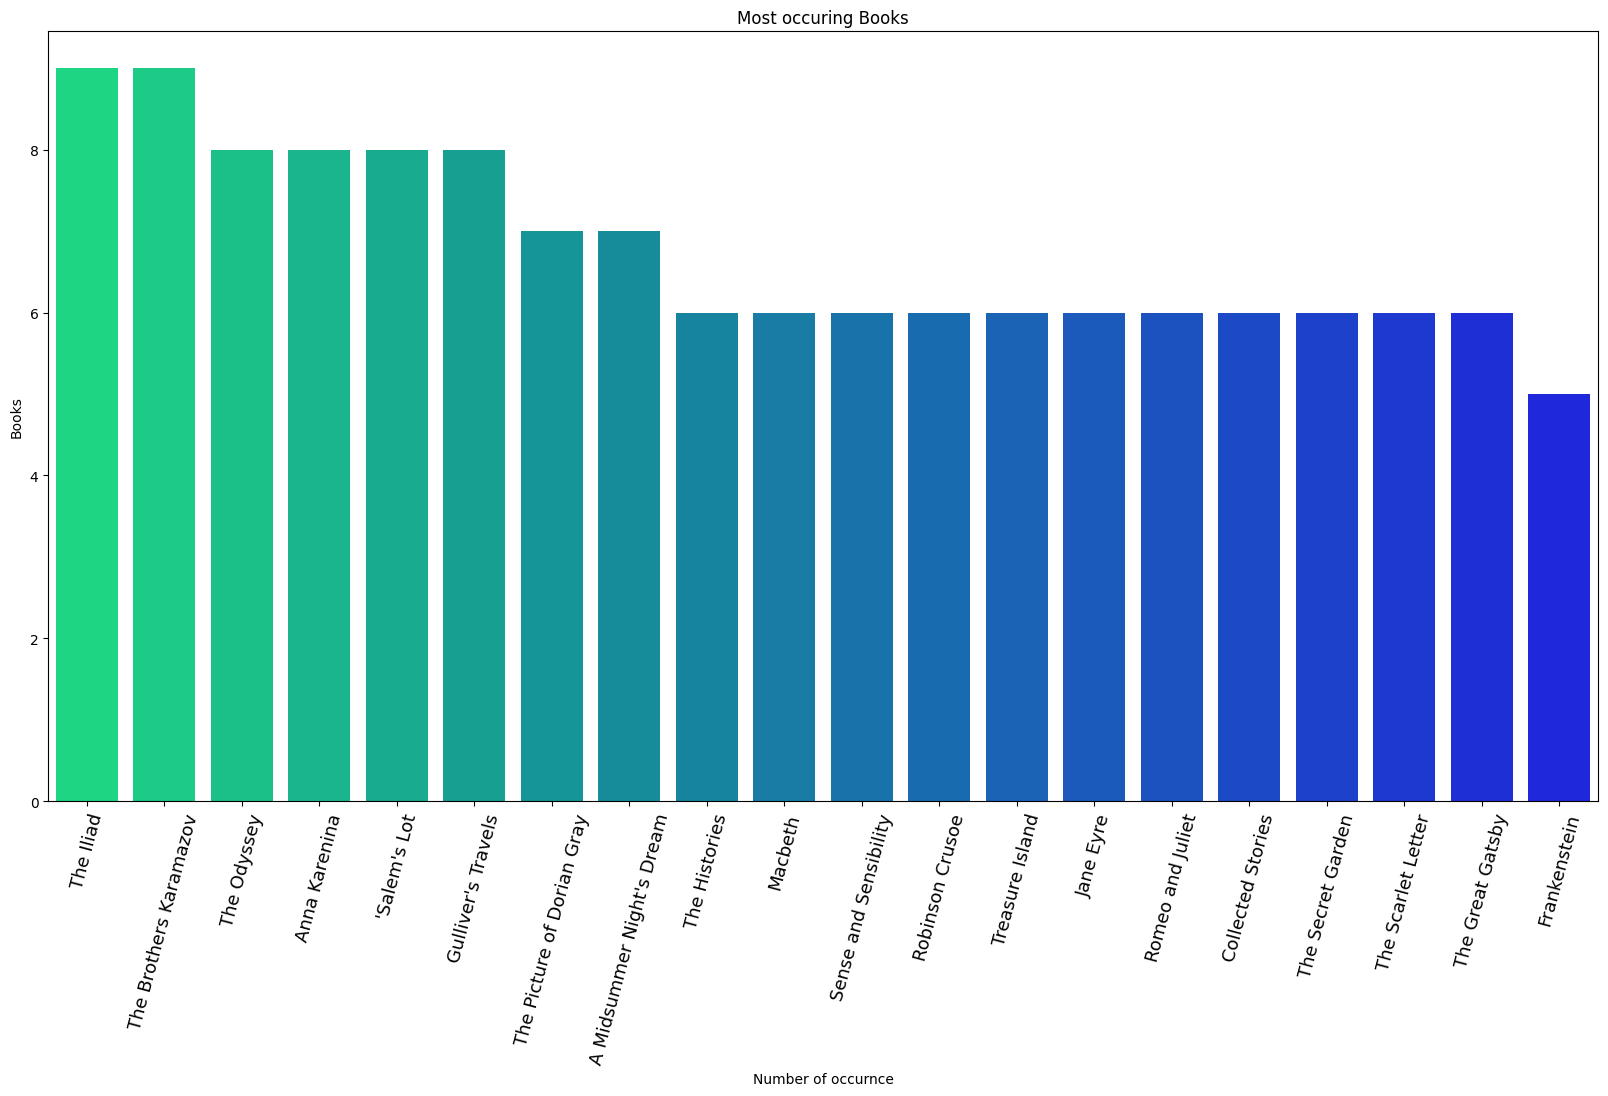

In [62]:
# To find most occuring book in our data
plt.figure(figsize=(20,10))
book=df['title'].value_counts()[:20]
sns.barplot(x=book.index,y=book,palette='winter_r')
plt.title('Most occuring Books')
plt.xlabel('Number of occurnce')
plt.ylabel('Books')
plt.xticks(rotation=75,fontsize=13)
plt.show()


<ipython-input-63-09cf2b98815a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


<Axes: xlabel='average_rating', ylabel='Density'>

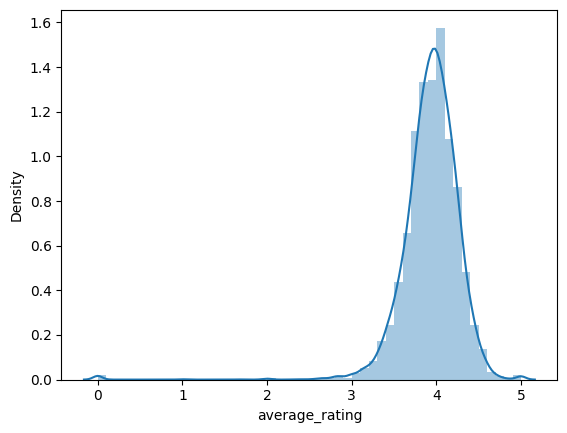

In [63]:
sns.distplot(df['average_rating'])

In [67]:
df[df['average_rating']==df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


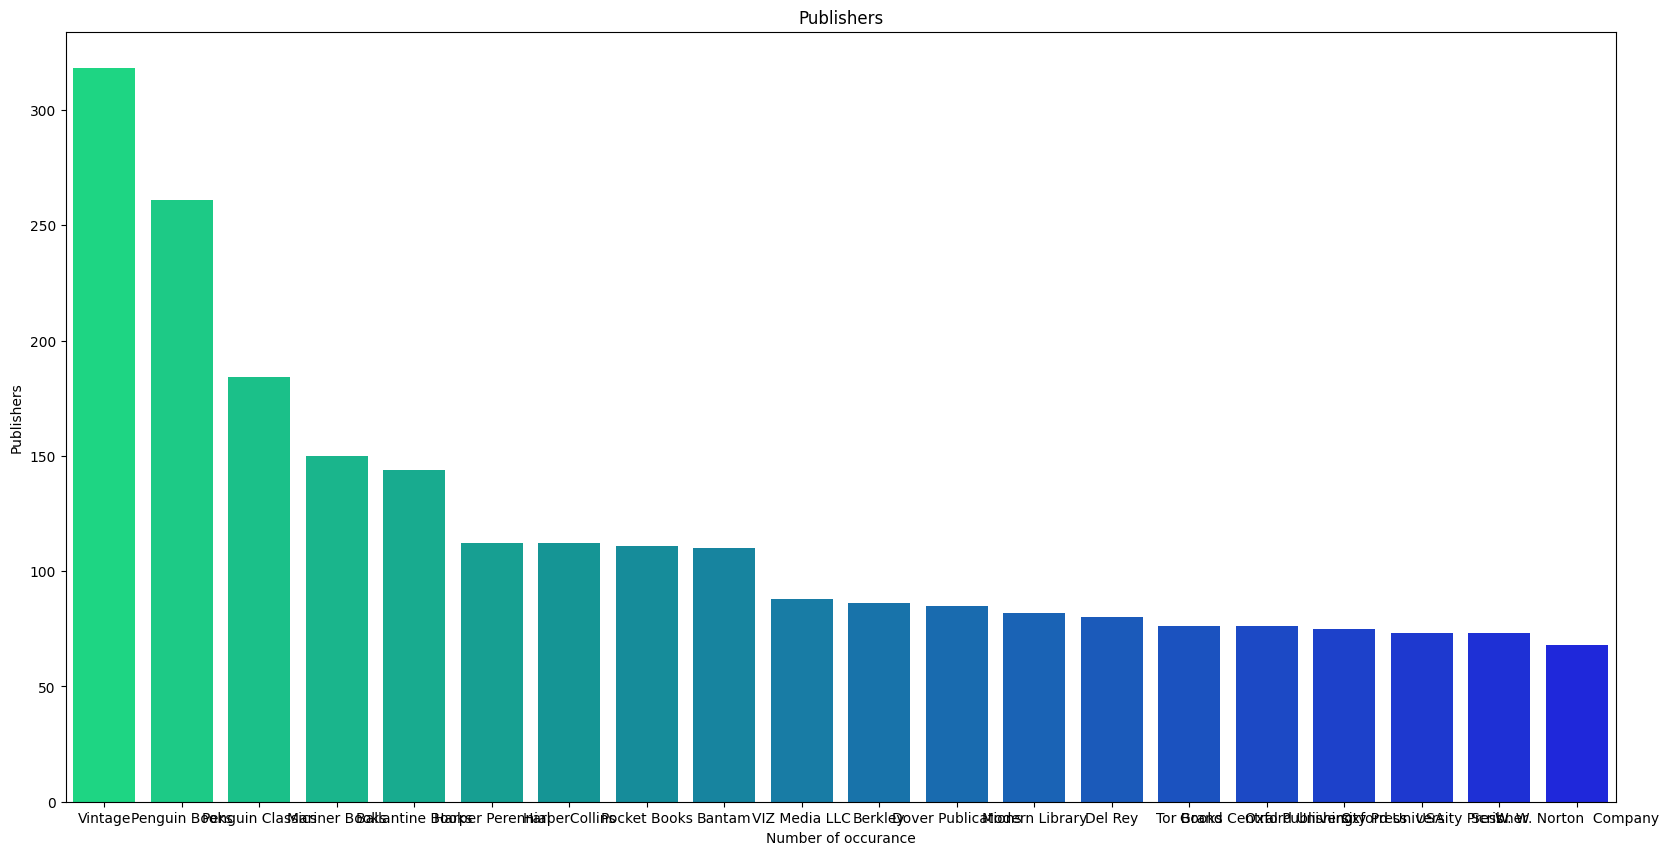

In [69]:
plt.figure(figsize=(20,10))
publisher=df['publisher'].value_counts()[:20]
sns.barplot(x=publisher.index,y=publisher,palette='winter_r')
plt.title('Publishers')
plt.xlabel('Number of occurance')
plt.ylabel('Publishers')
plt.show()

# Recommending Books based on

* Publishers
* Authors
* Language

In [72]:
df.publisher.value_counts()

Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: publisher, Length: 2290, dtype: int64

In [74]:
def recomd_books_publisheres(x):
  a=df[df['publisher']==x][['title','average_rating']]
  a=a.sort_values(by='average_rating',ascending =False)
  return a.head(10)

In [76]:
recomd_books_publisheres('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [81]:
@interact
def recomd_books_publisheres(publisher_name=list(df['publisher'].value_counts().index)):
  a=df[df['publisher']==publisher_name][['title','average_rating']]
  a=a.sort_values(by ='average_rating',ascending=False)
  return a.head(10)



interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [82]:
@interact
def recomd_books_authors(authors_name=list(df['authors'].value_counts().index)):
  a=df[df['authors']==authors_name][['title','average_rating']]
  a=a.sort_values(by='average_rating',ascending=False)
  return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko …

In [84]:
@interact
def recomd_books_lang(language=list(df['language_code'].value_counts().index)):
  a=df[df['language_code']==language][['title','average_rating']]
  a=a.sort_values(by='average_rating',ascending=False)
  return a.head(20)


interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

# Data Preprocessing

In [85]:
df.head(1)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006


In [88]:
def num_to_obj(x):
  if x>0 and x<=1:
    return "between 0 and 1"
  if x>1 and x<=2:
    return "between 1 and 2"
  if x>2 and x<=3:
    return "between 2 and 3"
  if x>3 and x<=4:
    return "between 3 and 4"
  if x>4 and x<=5:
    return "between 4 and 5"

df['rating_obj']= df['average_rating'].apply(num_to_obj)

In [89]:
df['rating_obj'].value_counts()

between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: rating_obj, dtype: int64

In [91]:
rating_df=pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [93]:
language_df=pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
features=pd.concat([rating_df,language_df,df['average_rating'],df['ratings_count'],df['title']],axis=1)
features.set_index('title',inplace=True)
features.head()


,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [95]:
from sklearn.preprocessing import MinMaxScaler


In [97]:
scaler=MinMaxScaler()
features_scaled=scaler.fit_transform(features)

In [98]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Model Building

In [99]:
from sklearn import neighbors


In [101]:
model =neighbors.NearestNeighbors(n_neighbors=5,algorithm='ball_tree',metric='euclidean')
model.fit(features_scaled)
dist,idlist=model.kneighbors(features_scaled)

In [108]:
@interact
def BookRecomender(book_name=list(df['title'].value_counts().index)):
  book_list_name=[]
  book_id=df[df['title']==book_name].index
  book_id=book_id[0]
  for newid in idlist[book_id]:
    book_list_name.append(df.iloc[newid].title)
  return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…